# Setup
Setting up the simulation requires the following data/configuration:
#### [Cluster generation](#cluster_generation)
Using `hpconfig` either as a JSON creator, or to produce an intermediary dictionary (preferred)

#### [Observation schedule generation ](#observation_generation) (In Progress)
Observations schedule describes the ingest and data that will be moving across the system during the simulation 

#### [Pipeline generation](#pipeline_generation) (In Progress)
   * `topsim_pipelines` will generate costs for the workflows that match for the HPSOs in the observation schedule

#### [Telescope generation](#telescope_generation)

Telescope configuration: Information on what the size of the instrument (e.g. number of antennas, number of resources used at Ingest, and descriptions of the pipelines that are used during ingest).
    * Telescope generation occurs at the end of the process, as it involves wrapping all the other dictionaries into one final JSON-serializable dictionary
    
#### [Simulation Visualisation](#sim_vis)

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../thesis_experiments'))
sys.path.insert(0, os.path.abspath('../../topsim_pipelines'))

## Cluster generation<a id=cluster_generation></a>
Cluster generation is acheived through the `hpconfig` tool, which provides a command-line interface, or a class-based approach to producing a JSON-ready dictionary:

In [ ]:
from hpconfig.specs.pawsey.galaxy import GalaxyNoGPU
cluster = GalaxyNoGPU().create_config_dict()
# Let's see what the cluster looks like
cluster['cluster']['header']

## Observation generation

The mid-term schedule is formed by a list of observations, each of which is assocated with a HPSO and corresponding processing pipeline(s). The challenge we have in this situation is that observation scheduling for telescopes is non-trivial (it is another scheduling problem in NP), and the constraints and observation details for the SKA are still to be decided. For the purpose of TOpSim and these experiments, we need to demonstrate how different combinations of observations in a schedule are will look on the system; this could be done randomly, or with specific scheduling constraints imposed on a sequence of observations. 

We need to translated each of these into something like: 

In [ ]:
"""
"observations": [
    {
    "name": "observation1",
    "start": 0,
    "duration": 30, # Time is in minutes, 0.1 of 5hours 
    "demand": 36,
    "workflow": "drepa_worklow_config_file.json",
    "type": "drepa",
    "data_product_rate": 3.79 ## This is petaflops/minute
    },
    ....
"""

## Pipeline Generation<a id=pipeline_generation></a>
Pipeline generation involves the following steps:

1. Use the [EAGLE](https://eagle.icrar.org) online editor to produce a Logical Graph Template (LGT). 
2. 

## Simulation Visualisation<a id=sim_vis></a>

In [9]:
import os
import logging
import simpy
import time

In [10]:
from topsim.core.simulation import Simulation
from topsim.core.delay import DelayModel
from user.telescope import Telescope
from user.scheduling import GreedyAlgorithmFromPlan

In [11]:
logging.basicConfig(level="DEBUG")
LOGGER = logging.getLogger(__name__)

os.chdir('/home/rwb/github/thesis_experiments')
fseries = 'visualisation_playground/series_observations.json'
fparallel =  'visualisation_playground/parallel_observations.json.
config = [fseries,fparallel]
for f in config:
    env = simpy.Environment()
    dm = DelayModel(0.20, 'normal', DelayModel.DelayDegree.HIGH)

    instrument = Telescope
    timestamp = f'{time.time()}'.split('.')[0]
    cfg = f.split('/')[-1]
    simulation = Simulation(
        env=env,
        config=CONFIG,
        instrument=instrument,
        algorithm_map={'heft': 'heft', 'fifo': GreedyAlgorithmFromPlan},
        delay=dm,
        timestamp=f'visualisation_playground/results/{cfg}-{timestamp}'
    )

In [12]:
simulation.start(-1)

DEBUG:topsim.core.monitor:SimTime=0
INFO:user.telescope:Observation emu1 scheduled for 0
DEBUG:topsim.core.scheduler:Buffer has enough capacity for emu1
DEBUG:topsim.core.scheduler:Cluster is able to process ingest for observation emu1
INFO:user.telescope:telescope is now using 18 arrays
DEBUG:topsim.core.scheduler:Scheduler starting up...
INFO:topsim.core.scheduler:Time on Scheduler: 0
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [400]
DEBUG:topsim.core.planner:Solution makespan for heft is 308
DEBUG:topsim.core.buffer:Current HotBuffer capacity is 247 @ 0
DEBUG:topsim.core.monitor:SimTime=1
INFO:topsim.core.scheduler:Time on Scheduler: 1
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [247] 
ColdBuffer: [400]
DEBUG:topsim.core.buffer:Current HotBuffer capacity is 244 @ 1
DEBUG:topsim.core.monitor:SimTime=2
INFO:topsim.core.scheduler:Time on Scheduler

INFO:topsim.core.buffer:HotBuffer: [240] 
ColdBuffer: [360]
DEBUG:topsim.core.buffer:Removing observation from buffer at time 21
DEBUG:topsim.core.task:emu1_0_channel_split9 finished at 23
DEBUG:topsim.core.monitor:SimTime=22
INFO:topsim.core.scheduler:Time on Scheduler: 22
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_channel_split6-cat0_m3 made to cluster
INFO:topsim.core.buffer:HotBuffer: [245] 
ColdBuffer: [355]
DEBUG:topsim.core.buffer:Removing observation from buffer at time 22
DEBUG:topsim.core.task:emu1_0_channel_split7 finished at 24
DEBUG:topsim.core.monitor:SimTime=23
INFO:topsim.core.scheduler:Time on Scheduler: 23
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_channel_split-cat0_m5 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_channel_split2-cat0_m4 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=41
INFO:topsim.core.scheduler:Time on Scheduler: 41
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c7_1-cat0_m12 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c5_0-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=42
INFO:topsim.core.scheduler:Time on Scheduler: 42
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c1_1-cat0_m14 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=43
INFO:topsim.core.scheduler:Time on Scheduler: 43
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=44
INFO:topsim.core.scheduler:T

DEBUG:topsim.core.task:emu2_10_c9_1 finished at 67
DEBUG:topsim.core.monitor:SimTime=66
INFO:topsim.core.scheduler:Time on Scheduler: 66
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c6_1 finished at 68
DEBUG:topsim.core.monitor:SimTime=67
INFO:topsim.core.scheduler:Time on Scheduler: 67
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c1_2-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_1 finished at 69
DEBUG:topsim.core.monitor:SimTime=68
INFO:topsim.core.scheduler:Time on Scheduler: 68
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c6_2-cat0_m1 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=69
INFO:topsim.

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=91
INFO:topsim.core.scheduler:Time on Scheduler: 91
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=92
INFO:topsim.core.scheduler:Time on Scheduler: 92
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=93
INFO:topsim.core.scheduler:Time on Scheduler: 93
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=94
INFO:topsim.core.scheduler:Time on Scheduler: 94
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c9_2 finished at 96
DEBUG:topsim.core.monitor

DEBUG:topsim.core.monitor:SimTime=116
INFO:topsim.core.scheduler:Time on Scheduler: 116
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c4_4 finished at 118
DEBUG:topsim.core.monitor:SimTime=117
INFO:topsim.core.scheduler:Time on Scheduler: 117
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c3_5-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c5_4 finished at 119
DEBUG:topsim.core.monitor:SimTime=118
INFO:topsim.core.scheduler:Time on Scheduler: 118
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c4_5-cat0_m11 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c9_3 finished at 120
DEBUG:topsim.core.monitor:SimTime=119
I

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu1_0_c0_4 finished at 140
DEBUG:topsim.core.monitor:SimTime=139
INFO:topsim.core.scheduler:Time on Scheduler: 139
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c3_5-cat0_m4 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_5 finished at 141
DEBUG:topsim.core.task:emu1_0_c1_4 finished at 141
DEBUG:topsim.core.monitor:SimTime=140
INFO:topsim.core.scheduler:Time on Scheduler: 140
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c0_5-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c1_5 finished at 142
DEBUG:topsim.core.task:emu1_0_c6_4 finished at 142
DEBUG:topsim.core.monitor:SimTime=141
INFO:topsim.core.scheduler:Time on Scheduler: 141
DEBUG:topsi

DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c5_7-cat0_m6 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c5_6-cat0_m12 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=162
INFO:topsim.core.scheduler:Time on Scheduler: 162
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c1_6-cat0_m11 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=163
INFO:topsim.core.scheduler:Time on Scheduler: 163
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c0_6-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_6 finished at 165
DEBUG:topsim.core.monitor:SimTime=164
INFO:topsim.core.scheduler:Time on Scheduler

DEBUG:topsim.core.task:emu1_0_c6_6 finished at 188
DEBUG:topsim.core.monitor:SimTime=187
INFO:topsim.core.scheduler:Time on Scheduler: 187
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c0_7-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_7 finished at 189
DEBUG:topsim.core.task:emu1_0_c4_6 finished at 189
DEBUG:topsim.core.monitor:SimTime=188
INFO:topsim.core.scheduler:Time on Scheduler: 188
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c6_7-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c1_7 finished at 190
DEBUG:topsim.core.monitor:SimTime=189
INFO:topsim.core.scheduler:Time on Scheduler: 189
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c2_8-

DEBUG:topsim.core.monitor:SimTime=210
INFO:topsim.core.scheduler:Time on Scheduler: 210
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c4_10-cat0_m12 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c1_8-cat0_m6 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu1_0_c6_7 finished at 212
DEBUG:topsim.core.task:emu2_10_c9_8 finished at 212
DEBUG:topsim.core.monitor:SimTime=211
INFO:topsim.core.scheduler:Time on Scheduler: 211
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c3_10-cat0_m11 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c0_8-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu1_0_c4_7 finished at 213
DEBUG:topsim.core.task:emu2_10_c8_8 finished at 213
DEBUG:topsim.core.task:emu2_10_c2_9 finished at 213
DEB

INFO:topsim.core.scheduler:Allocation emu1_0_c4_9-cat0_m2 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c9_10 finished at 232
DEBUG:topsim.core.monitor:SimTime=231
INFO:topsim.core.scheduler:Time on Scheduler: 231
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c3_9-cat0_m9 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c8_10 finished at 233
DEBUG:topsim.core.task:emu1_0_c5_9 finished at 233
DEBUG:topsim.core.monitor:SimTime=232
INFO:topsim.core.scheduler:Time on Scheduler: 232
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c9_11-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c7_10 finished at 234
DEBUG:topsim.core.task:emu1_0_c1_9 finished at 234
DEBUG:topsim.core.m

INFO:topsim.core.scheduler:Allocation emu1_0_c0_11-cat0_m2 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c5_12 finished at 254
DEBUG:topsim.core.monitor:SimTime=253
INFO:topsim.core.scheduler:Time on Scheduler: 253
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c3_11-cat0_m4 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c1_11 finished at 255
DEBUG:topsim.core.task:emu2_10_c4_12 finished at 255
DEBUG:topsim.core.monitor:SimTime=254
INFO:topsim.core.scheduler:Time on Scheduler: 254
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c5_13-cat0_m3 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c5_11-cat0_m9 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_11 finishe

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=275
INFO:topsim.core.scheduler:Time on Scheduler: 275
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c9_14-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu1_0_c6_11 finished at 277
DEBUG:topsim.core.task:emu2_10_c7_13 finished at 277
DEBUG:topsim.core.monitor:SimTime=276
INFO:topsim.core.scheduler:Time on Scheduler: 276
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu1_0_c1_11 finished at 278
DEBUG:topsim.core.task:emu2_10_c8_13 finished at 278
DEBUG:topsim.core.monitor:SimTime=277
INFO:topsim.core.scheduler:Time on Scheduler: 277
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c7_14-cat0_m1

INFO:topsim.core.scheduler:Allocation emu2_10_c0_15-cat0_m7 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c0_13-cat0_m5 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.monitor:SimTime=297
INFO:topsim.core.scheduler:Time on Scheduler: 297
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c4_15-cat0_m18 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c3_14-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_14 finished at 299
DEBUG:topsim.core.monitor:SimTime=298
INFO:topsim.core.scheduler:Time on Scheduler: 298
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c6_14-cat0_m3 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c3_14 finished at 300
DEBUG:topsim.core.mo

INFO:topsim.core.scheduler:Allocation emu2_10_c8_16-cat0_m1 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c1_15 finished at 320
DEBUG:topsim.core.monitor:SimTime=319
INFO:topsim.core.scheduler:Time on Scheduler: 319
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c4_17-cat0_m7 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c6_15 finished at 321
DEBUG:topsim.core.monitor:SimTime=320
INFO:topsim.core.scheduler:Time on Scheduler: 320
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c1_16-cat0_m18 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c2_16 finished at 322
DEBUG:topsim.core.monitor:SimTime=321
INFO:topsim.core.scheduler:Time on Scheduler: 321
DEBUG:topsim.core.scheduler:

DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c1_18-cat0_m14 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c6_16-cat0_m1 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c0_17 finished at 340
DEBUG:topsim.core.monitor:SimTime=339
INFO:topsim.core.scheduler:Time on Scheduler: 339
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c6_18-cat0_m13 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c1_16-cat0_m18 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu1_0_c4_15 finished at 341
DEBUG:topsim.core.monitor:SimTime=340
INFO:topsim.core.scheduler:Time on Scheduler: 340
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu2_10_c0_18-cat0_m7 made to cluster
INFO:top

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c3_18 finished at 362
DEBUG:topsim.core.task:emu1_0_c5_17 finished at 362
DEBUG:topsim.core.monitor:SimTime=361
INFO:topsim.core.scheduler:Time on Scheduler: 361
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c4_18-cat0_m1 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c1_18 finished at 363
DEBUG:topsim.core.task:emu1_0_c7_17 finished at 363
DEBUG:topsim.core.monitor:SimTime=362
INFO:topsim.core.scheduler:Time on Scheduler: 362
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.scheduler:Allocation emu1_0_c5_18-cat0_m10 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
DEBUG:topsim.core.task:emu2_10_c6_18 finished at 364
DEBUG:topsim.core.task:emu1_0_c8_17 finished at 364
DEBUG:topsim.core.monitor:SimTime=363


DEBUG:topsim.core.monitor:SimTime=391
INFO:topsim.core.scheduler:Time on Scheduler: 391
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
DEBUG:user.scheduling:is finished emu1
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [400]
DEBUG:topsim.core.monitor:SimTime=392
INFO:topsim.core.scheduler:Time on Scheduler: 392
DEBUG:topsim.core.scheduler:Scheduler Status: SchedulerStatus.RUNNING
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [400]
INFO:topsim.core.simulation:Simulation Finished @ 393.0


In [21]:
logging.basicConfig(level="WARNING")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
series = "visualisation_playground/results/series_observations.json-1619693216-heft-GreedyAlgorithmFromPlan-sim.pkl"
parallel = ""
sim_df = pd.read_pickle(pickle)
sim_df.head()

,available_resources,occupied_resources,ingest_resources,running_tasks,finished_tasks,observations_waiting,observations_finished,observations_delayed,telescope_status,delay_status,observation_queue,schedule_status,delay_offset,algtime,emu1-algtime,emu2-algtime
0,20,0,0,0,0,0,0,0,False,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg,NaN,NaN
1,10,0,0,5,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg,NaN,NaN
2,10,0,0,5,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg,NaN,NaN
3,10,0,0,5,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg,NaN,NaN
4,10,0,0,5,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg,NaN,NaN


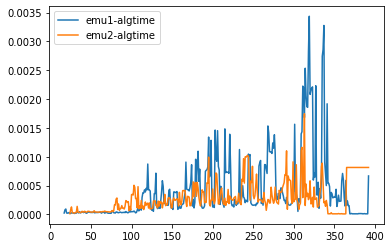

In [23]:
sim_df[['emu1-algtime','emu2-algtime']].plot()
plt.show()

,available_resources,occupied_resources,ingest_resources,running_tasks,finished_tasks,observations_waiting,observations_finished,observations_delayed,telescope_status,delay_status,observation_queue,schedule_status,delay_offset,algtime
0,20,0,0,0,0,0,0,0,False,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg
1,5,0,0,10,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg
2,5,0,0,10,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg
3,5,0,0,10,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg
4,5,0,0,10,0,0,0,0,True,False,NaN,ScheduleStatus.ONTIME,ScheduleStatus.ONTIME,alg
